# Chronic Kidney Disease dataset
Data Preprocessing & Analysis with Model Prediction
Dr. Subramani Suresh

In [176]:
#Data collection
import pandas as pd
import numpy as np
import warnings
# Ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

dataset=pd.read_csv("kidney_disease.csv")
#orginal dataset
dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,Normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,Ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notPresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,Ckd
2,2,62.0,80.0,1.010,2.0,3.0,Normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


# Data Preprocessing

In [177]:
# columns name
dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [178]:
# renames columns into more meaningful
dataset.rename(columns={
    "id": "patient_id",
    "age": "age",
    "bp": "blood_pressure",
    "sg": "specific_gravity",
    "al": "albumin",
    "su": "sugar",
    "rbc": "red_blood_cells",
    "pc": "pus_cell",
    "pcc": "pus_cell_clumps",
    "ba": "bacteria",
    "bgr": "blood_glucose_random",
    "bu": "blood_urea",
    "sc": "serum_creatinine",
    "sod": "sodium",
    "pot": "potassium",
    "hemo": "hemoglobin",
    "pcv": "packed_cell_volume",
    "wc": "white_blood_cell_count",
    "rc": "red_blood_cell_count",
    "htn": "hypertension",
    "dm": "diabetes_mellitus",
    "cad": "coronary_artery_disease",
    "appet": "appetite",
    "pe": "pedal_edema",
    "ane": "anemia",
    "classification": "cdk_class"
}, inplace=True)
# after renamed
dataset.dtypes

patient_id                   int64
age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
cdk_class                   object
dtype: object

In [179]:
'''Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.'''
dataset.describe()

,patient_id,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [180]:
# Check each categorical (object) if uppercase exists
def df_check_uppercase(df):
    print("\nuppercase present 'yes'/'no'\n-----------------------------")
    for col in df.select_dtypes(include="object").columns:
        has_upper = df[col].str.contains(r'[A-Z]').any()    
        print(f"{col}: {"uppercase present 'yes'" if has_upper else 'no'}")
    print("\ndataset = uppercase present 'yes'" if has_upper else '\ndataset = uppercase not present')

#check_uppercase in dataset
df_check_uppercase(dataset)


uppercase present 'yes'/'no'
-----------------------------
red_blood_cells: uppercase present 'yes'
pus_cell: uppercase present 'yes'
pus_cell_clumps: uppercase present 'yes'
bacteria: no
packed_cell_volume: no
white_blood_cell_count: no
red_blood_cell_count: no
hypertension: no
diabetes_mellitus: no
coronary_artery_disease: no
appetite: no
pedal_edema: no
anemia: no
cdk_class: uppercase present 'yes'

dataset = uppercase present 'yes'


In [181]:
# Check each categorical (object) column and convert all text values to lowercase
def df_convert_lowercase(df):
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].str.lower()
    return df
#convert_lowercase in dataset
dataset=df_convert_lowercase(dataset)
#check_uppercase in dataset
df_check_uppercase(dataset)


uppercase present 'yes'/'no'
-----------------------------
red_blood_cells: no
pus_cell: no
pus_cell_clumps: no
bacteria: no
packed_cell_volume: no
white_blood_cell_count: no
red_blood_cell_count: no
hypertension: no
diabetes_mellitus: no
coronary_artery_disease: no
appetite: no
pedal_edema: no
anemia: no
cdk_class: no

dataset = uppercase not present


In [182]:
#Detect missing values.
dataset.isnull().sum()

patient_id                   0
age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
cdk_class                    0
dtype: int64

In [183]:
#Detect missing values with order and %
def df_missing_info(df):
    missing_info = df.isnull().sum().to_frame(name='Missing')
    missing_info['% Missing (null)'] = (missing_info['Missing'] / len(df) * 100).round(2)
    missing_info = missing_info[missing_info['Missing'] > 0].sort_values(by='Missing', ascending=False)
    print(missing_info)
    
df_missing_info(dataset)

                         Missing  % Missing (null)
red_blood_cells              152             38.00
red_blood_cell_count         130             32.50
white_blood_cell_count       105             26.25
potassium                     88             22.00
sodium                        87             21.75
packed_cell_volume            70             17.50
pus_cell                      65             16.25
hemoglobin                    52             13.00
sugar                         49             12.25
specific_gravity              47             11.75
albumin                       46             11.50
blood_glucose_random          44             11.00
blood_urea                    19              4.75
serum_creatinine              17              4.25
blood_pressure                12              3.00
age                            9              2.25
pus_cell_clumps                4              1.00
bacteria                       4              1.00
hypertension                   

In [184]:
# looking at unique values in columns
def df_uni_val_info(df):
    for col in df:
        print(f"{col} {df[col].unique()} unique values | Type :{df[col].dtype}\n")
        
df_uni_val_info(dataset)

patient_id [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

In [185]:
# Clean the data based unique values, replace incorrect values eg. '\t6200', '\t?', '\tno','\tyes' etc
def df_clean_all(df):
    for col in df.columns:
        # convert everything to string
        df[col] = df[col].astype(str)
        # remove tabs
        df[col] = df[col].str.replace('\t', ' ', regex=False)
        # Step 3: remove newlines (\n newlines, \r carriage returns)
        df[col] = df[col].str.replace('\n', ' ', regex=False)
        df[col] = df[col].str.replace('\r', ' ', regex=False)
        # replace multiple spaces with a single space
        df[col] = df[col].str.replace(' +', ' ', regex=True)
        # strip leading and trailing spaces
        df[col] = df[col].str.strip()
        # replace empty or "nan" strings with real NaN
        df[col] = df[col].replace(['', ' ', 'nan', 'NaN', 'None'], np.nan)
        #Extra string remove
        df[col] = df[col].replace(['?'], np.nan)
        # try converting back to numeric if possible
        df[col] = pd.to_numeric(df[col], errors='ignore')
    return df

dataset=df_clean_all(dataset)

In [225]:
# looking at unique values after clean columns
df_uni_val_info(dataset[["diabetes_mellitus","red_blood_cell_count"]])

diabetes_mellitus ['yes' 'no'] unique values | Type :object

red_blood_cell_count [5.2  3.58 3.56 3.9  4.6  4.4  4.22 5.   4.   3.7  4.26 3.8  3.4  3.92
 2.6  2.8  4.36 4.3  3.2  3.6  3.64 4.1  4.12 4.02 3.52 3.76 3.48 4.9
 3.82 2.5  3.84 4.2  4.16 4.5  3.1  4.7  4.24 3.5  3.42 3.74 3.62 4.06
 3.72 4.76 4.12 4.04 6.   4.46 3.98 4.62 3.94 4.52 2.1  4.44 4.28 5.6
 4.42 4.82 2.3  4.68 3.96 4.52 4.14 4.48 4.46 4.34 3.26 3.28 3.98 2.9
 3.72 2.7  3.92 8.   4.54 5.1  3.52 3.3  3.   5.3  4.54 2.4  4.8  4.86
 5.4  4.08 3.18 4.88 4.32 4.06 3.76 4.16 4.02 3.46 4.14 4.68 5.26 5.32
 4.34 5.36 4.82 6.1  5.12 6.2  6.3  5.1  5.8  5.5  5.28 6.4  5.7  5.9
 5.44 6.5  4.86 5.42 4.94] unique values | Type :float64



In [187]:
df_missing_info(dataset)

                         Missing  % Missing (null)
red_blood_cells              152             38.00
red_blood_cell_count         131             32.75
white_blood_cell_count       106             26.50
potassium                     88             22.00
sodium                        87             21.75
packed_cell_volume            71             17.75
pus_cell                      65             16.25
hemoglobin                    52             13.00
sugar                         49             12.25
specific_gravity              47             11.75
albumin                       46             11.50
blood_glucose_random          44             11.00
blood_urea                    19              4.75
serum_creatinine              17              4.25
blood_pressure                12              3.00
age                            9              2.25
pus_cell_clumps                4              1.00
bacteria                       4              1.00
hypertension                   

Missing Values 
---------------
When to Remove Nulls Based on %
Rules of Thumb (Industry Practice)
1. Column removal: drop columns if >70–80% missing.
2. Row removal: drop rows if >50% missing values (depends on dataset size).
3. Otherwise: use imputation (mean, median, mode, regression, KNN, etc.).

Imputation : KNNImputer
------------------------
Missing values max 38%, so use
imputation method: KNNImputer. 
The KNNImputer (from sklearn.impute) fills missing values by finding 
the k nearest neighbors (rows) based on other feature values.
It replaces the missing value with the mean (default), median, 
or weighted average of those neighbors.

n_neighbors (int, default=5) # we can tune 2,3,5,6,....
Number of neighboring samples to use for imputation.

Benefits of KNNImputer
----------------------
1. Uses similar rows (neighbors) instead of global mean/median.
2. Preserves data patterns and variability.
3. Works for both numeric & categorical (after encoding).
4. Makes no strong assumptions about distribution.
5. Adaptive → imputes differently for different groups.
6. Often improves model accuracy compared to simple imputers.

In [188]:
# Handle missing values using the KNNImputer method
def df_fill_missing_values_knn(df):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import LabelEncoder
    from sklearn.impute import KNNImputer
    from sklearn.model_selection import train_test_split,cross_val_score
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
    
    # --- STEP 1: Identify categorical and numeric columns ----
    cat_cols = df.select_dtypes(include=['object']).columns
    num_cols = df.select_dtypes(exclude=['object']).columns
    #print("Categorical columns:\n", list(cat_cols))
    #print("Numeric columns:\n", list(num_cols))
    
    # --- STEP 2: Encode categorical columns ----------------
    encoders = {}
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = df[col].astype(str)  # ensure string
        df[col] = df[col].replace("nan", np.nan)
        mask = df[col].notna()
        if mask.sum() > 0:
            df.loc[mask, col] = le.fit_transform(df.loc[mask, col])
            encoders[col] = le
    
    # --- STEP 3: Apply KNN Imputer for categorical and numeric columns----
    df = df.apply(pd.to_numeric, errors='coerce')
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = imputer.fit_transform(df)
    df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
    
    #Encoded and imputed dataset (dataset contain numeric value only) for any model creation
    df_imputed_encoded=df_imputed.copy()
    
    #--- STEP 4: Valiation with KNeighborsClassifier Model--------
    
    #traget columns for prediction
    # get the last column name as target
    target_col = df.columns[-1]  
    # X, y split
    X=df_imputed.drop(target_col, axis=1)
    y=df_imputed[target_col]
    
    #split train and test set 20% test data 80% train data
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
    
    #model creation 
    model=KNeighborsClassifier(n_neighbors=5) #5
    model.fit(X_train,y_train)
    
    #y prediction for valitation
    y_pred = model.predict(X_test)
    
    # Valitation result
    print(f"\nImputation Validation: Based on KNN model\nTrain Set:")
    # Training set evaluation
    print(f"Model accuracy: {model.score(X_train,y_train):.2f}")
    # Test set evaluation
    print(f"Test Set:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"F1_score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC-AUC : {roc_auc_score(y_test, y_pred):.2f}")
    # Cross-validation
    cv_scores = cross_val_score(model, X, y, cv=10)  # 10 cross-fold CV
    print("Model Cross-Validation (10-fold) score:", cv_scores.mean())
    
    # --- STEP 4: Decode categorical columns -------
    # Decode for data analysis
    for col in cat_cols:
        if col in encoders:
            df_imputed[col] = df_imputed[col].round().astype(int)
            df_imputed[col] = encoders[col].inverse_transform(df_imputed[col])
    
    # df_imputed_encoded = dataset after encoding all categorical and numerical columns
    # df_imputed = dataset after decoding categorical columns back to original labels
    return df_imputed, df_imputed_encoded
#
#call function
dataset,dataset_encoded=df_fill_missing_values_knn(dataset)


Imputation Validation: Based on KNN model
Train Set:
Model accuracy: 0.96
Test Set:
Accuracy: 0.97
F1_score: 0.97
ROC-AUC : 0.98
Model Cross-Validation (10-fold) score: 0.9


In [226]:
# dataset after decoding categorical columns back to original labels
dataset

,patient_id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,cdk_class
0,0.0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,...,44.0,7800.0,5.20,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,...,38.0,6000.0,3.58,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,3.56,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.90,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.60,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395.0,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.90,no,no,no,good,no,no,notckd
396,396.0,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.20,no,no,no,good,no,no,notckd
397,397.0,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.40,no,no,no,good,no,no,notckd
398,398.0,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.90,no,no,no,good,no,no,notckd


In [191]:
# cleaned dataset without null/missing values
df_missing_info(dataset)

Empty DataFrame
Columns: [Missing, % Missing (null)]
Index: []


# Data Analysis

In [227]:
#split categorical column names
cat_cals=[cal for cal in dataset if dataset[cal].dtype==object]
cat_cals

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'pedal_edema',
 'anemia',
 'cdk_class']

# categorical columns

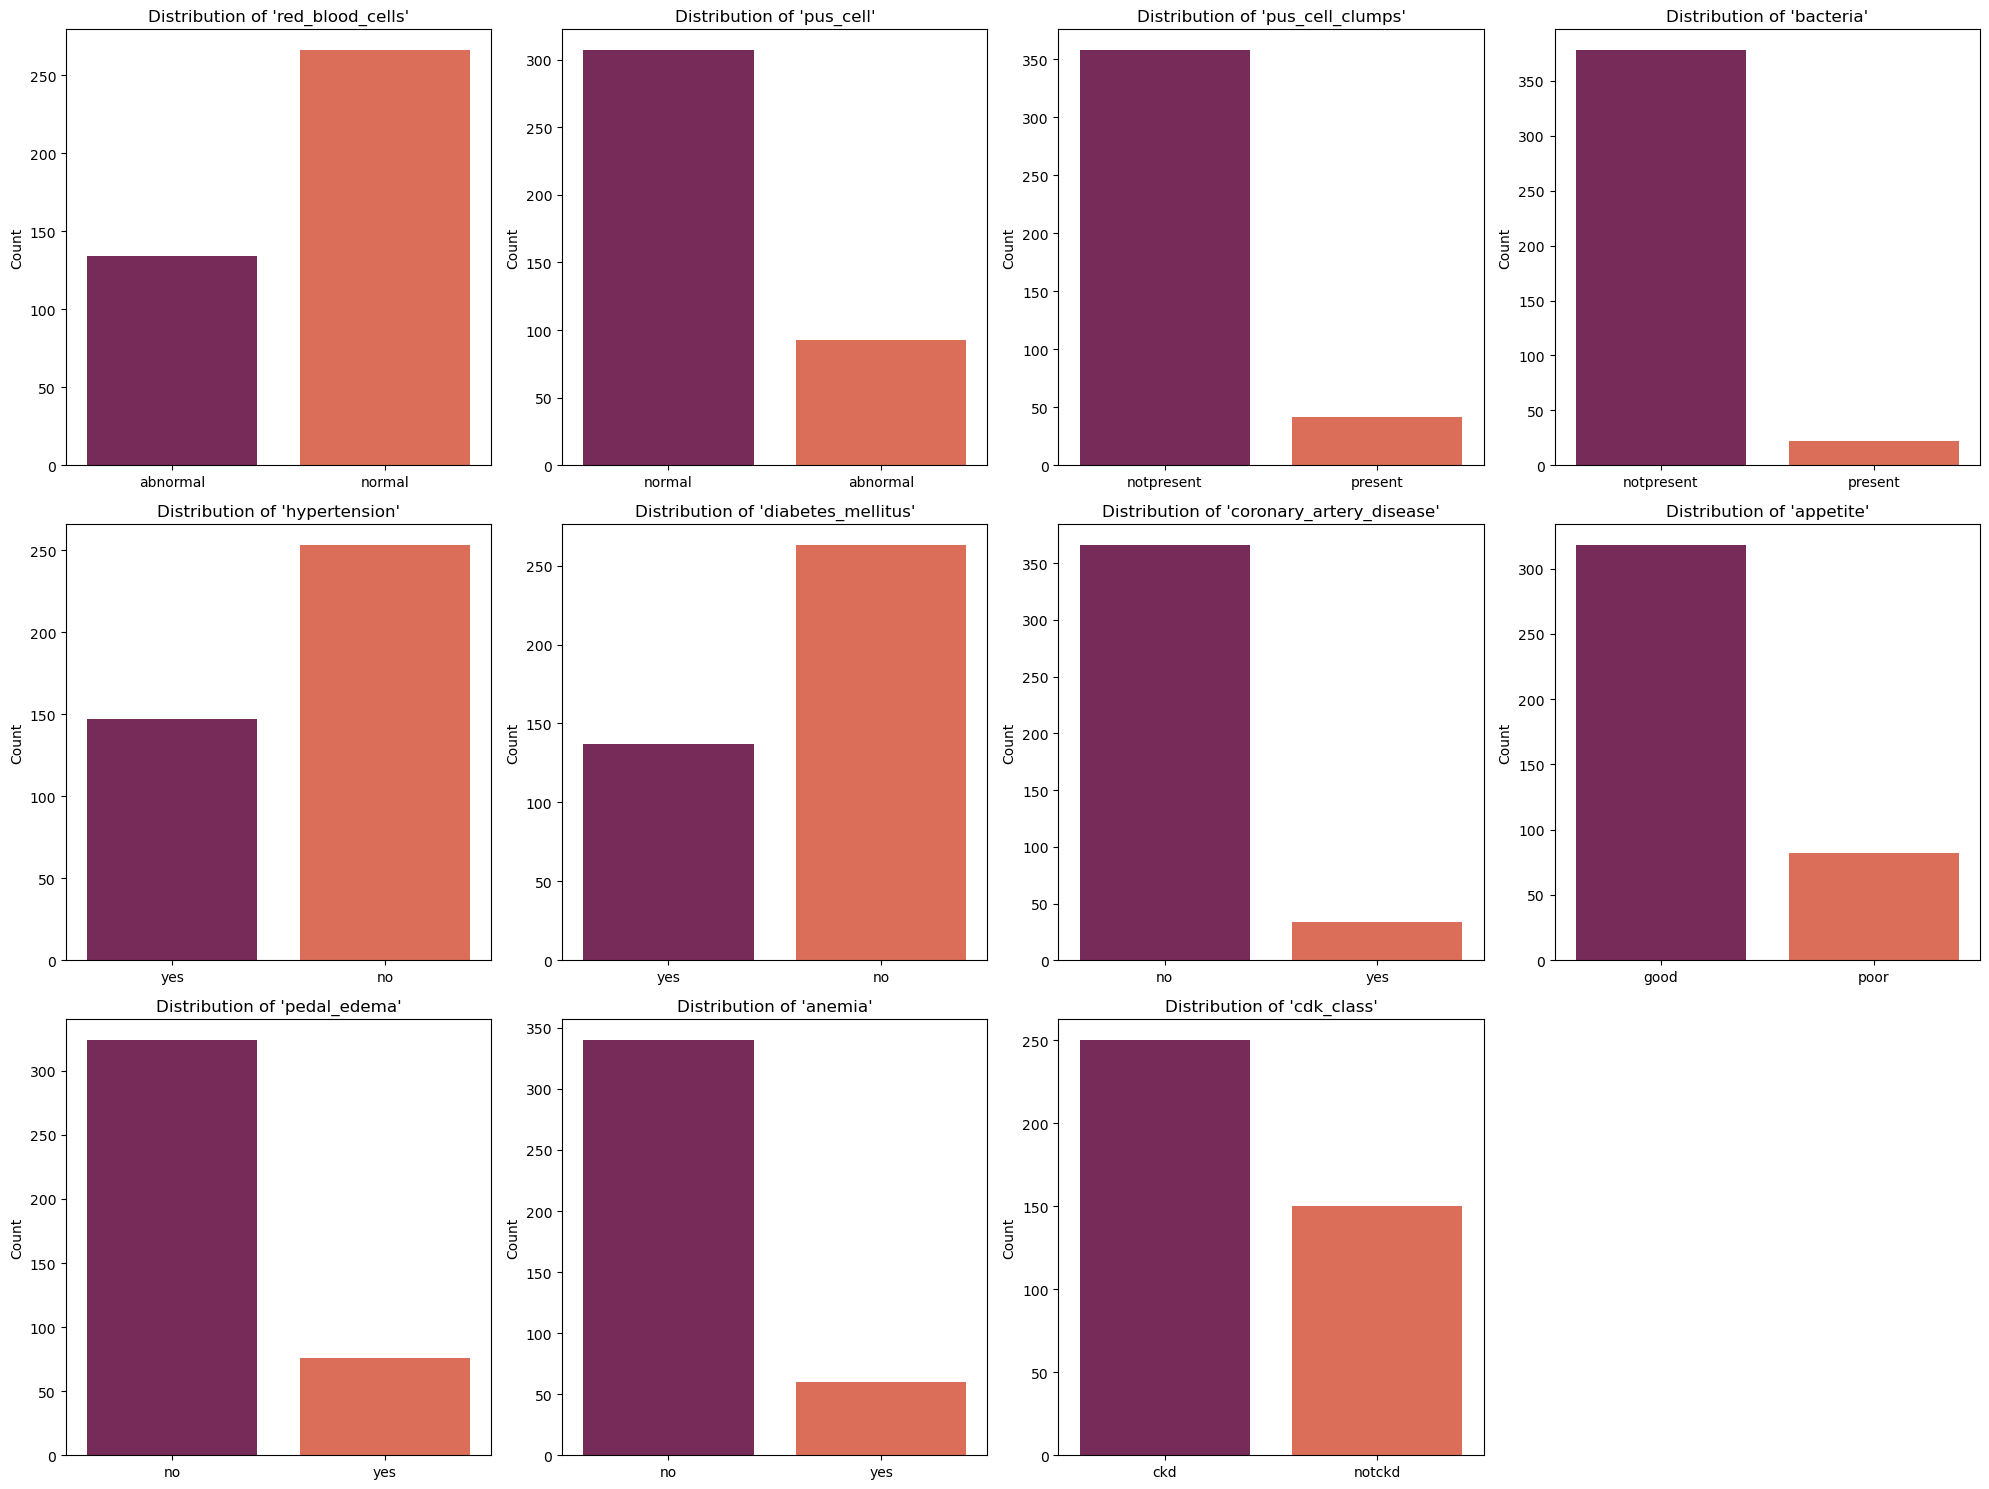

In [209]:
#looking at categorical columns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=dataset[column], palette='rocket', ax=ax)
        ax.set_title(f"Distribution of '{column}'")   # Title above each plot
        ax.set_xlabel("")  # optional: remove x-axis label if title is enough
        ax.set_ylabel("Count")
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Numeric column

In [216]:
#split numeric column names
num_cals=[cal for cal in dataset if dataset[cal].dtype!=object]
num_cals.remove("patient_id")
num_cals

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

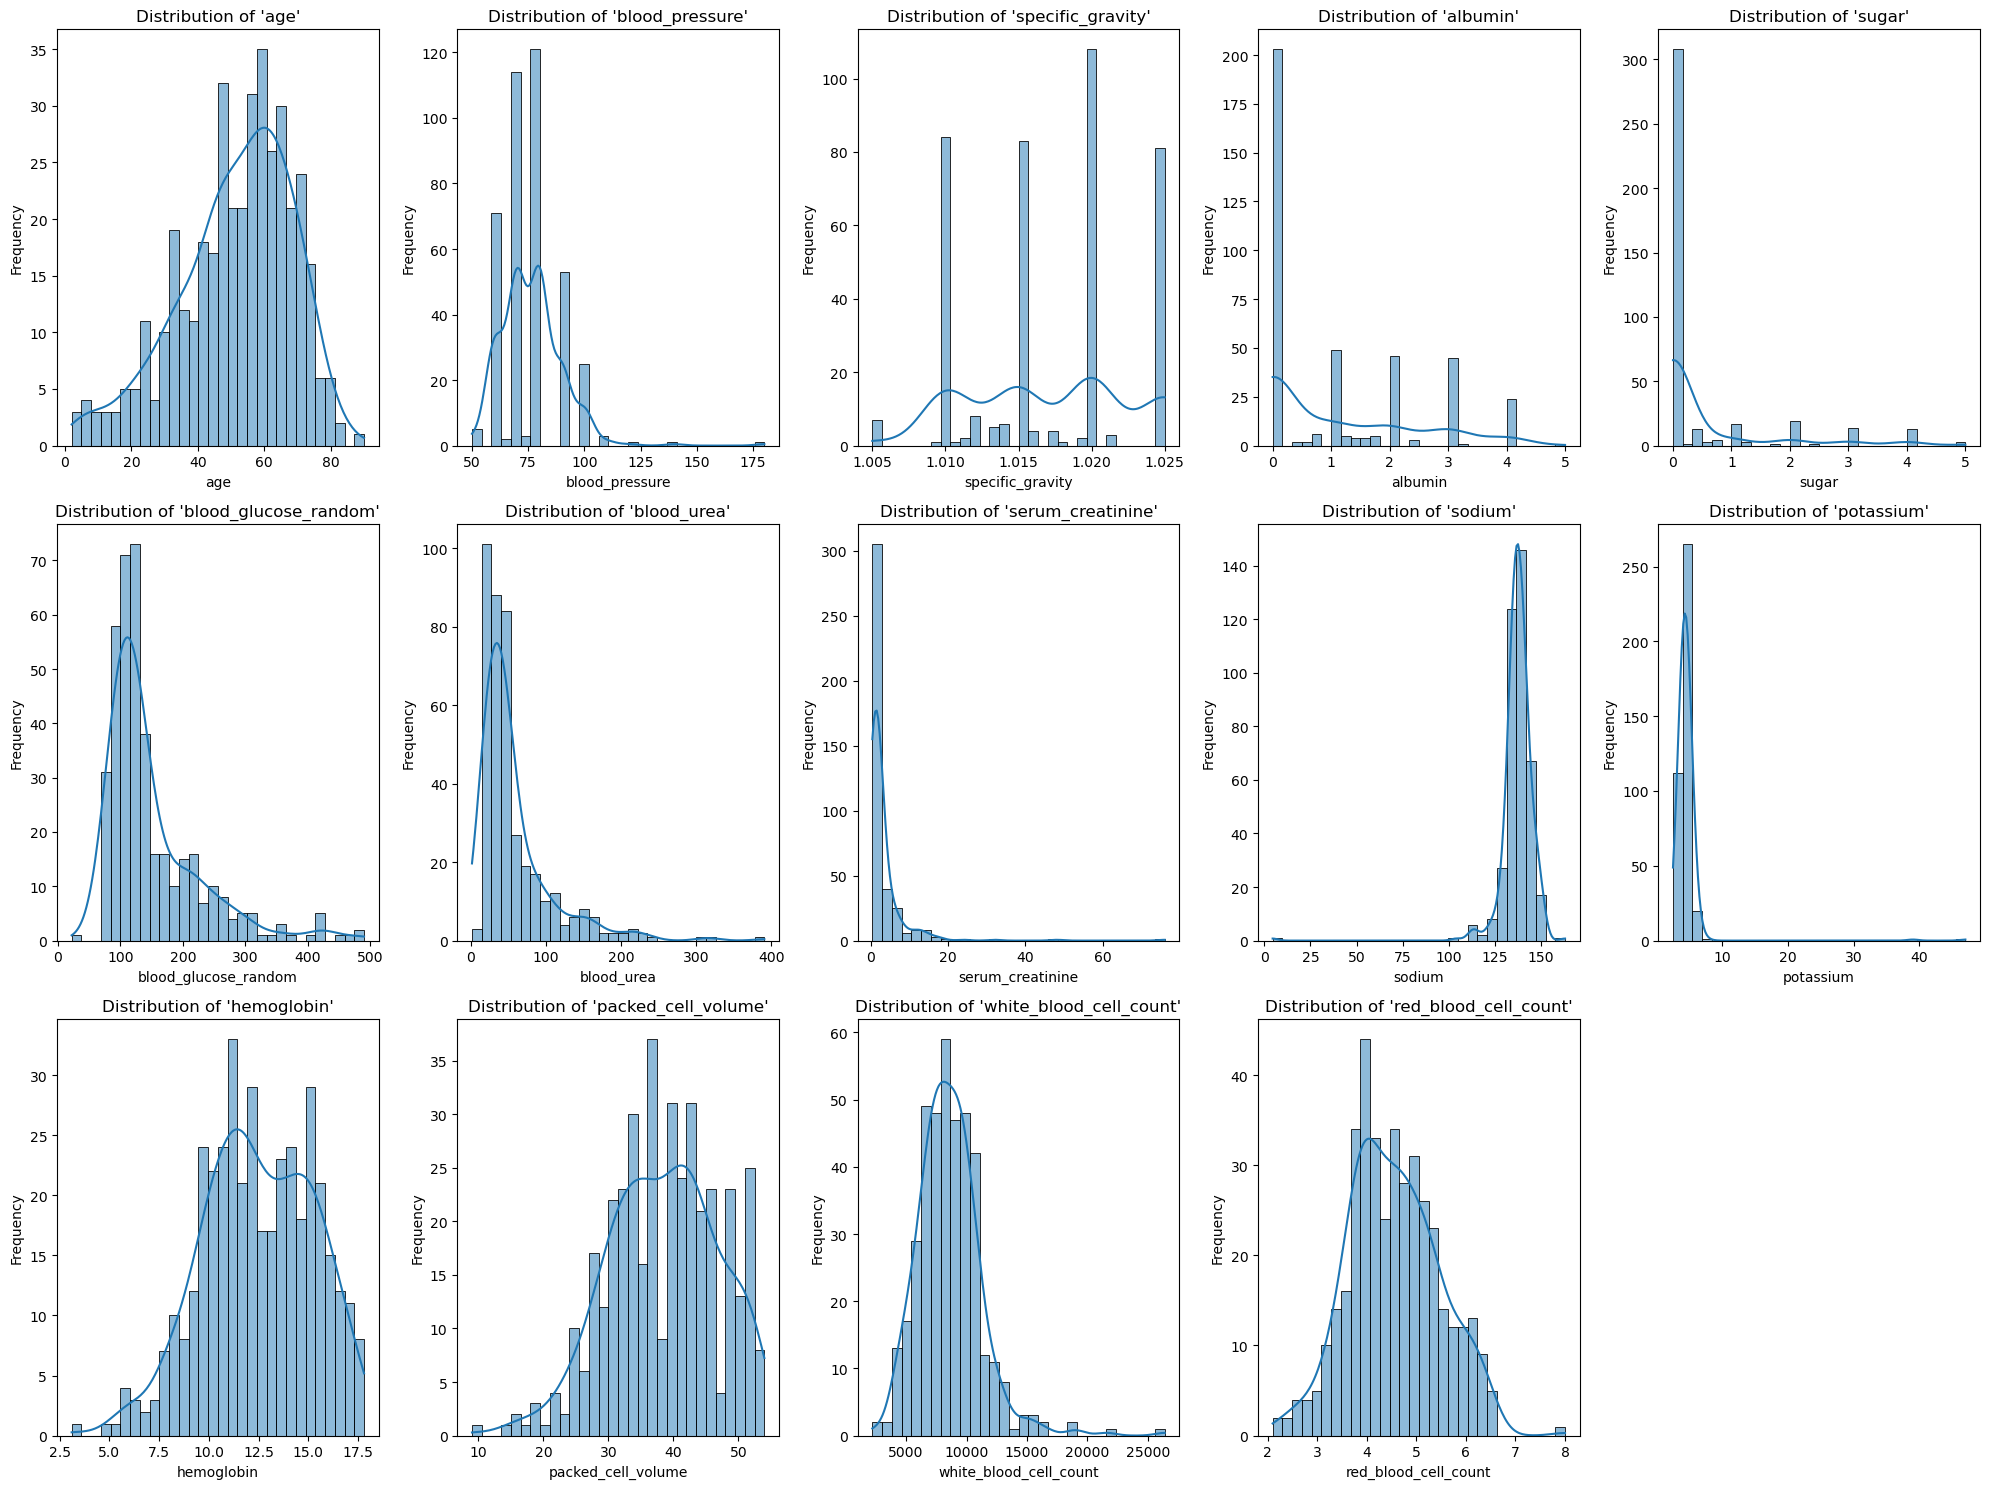

In [219]:
# checking numerical features distribution
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in num_cals:
    if plotnumber <= 14:   # adjust subplot grid if you have more/less features
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(dataset[column], kde=True, bins=30)  # kde=True adds density curve
        ax.set_title(f"Distribution of '{column}'")   # Title above each plot
        plt.xlabel(column)
        plt.ylabel("Frequency")

    plotnumber += 1

plt.tight_layout()
plt.show()

In [221]:
#looking at numeric column

#create New Table for central Tendency & descriptive
def UnivariateTable(df,num_cals):
    import pandas as pd
    import numpy as np
    descriptive=pd.DataFrame(index=["Mean","Median","Mode",
                                    "Min","Q1-25%","Q2-50%","Q3-75%","Max",
                                   "IQR","1.5-Rule","Lower-Bound","Upper-Bound"]
                             ,columns=num_cals)
    for cal in num_cals:
        #print(cal)
        descriptive.loc["Mean", cal] = round(df[cal].mean(), 2)
        descriptive.loc["Median", cal] = df[cal].median()
        descriptive.loc["Mode", cal] = round(df[cal].mode()[0], 2)
        descriptive.loc["Min",cal]=df.describe().loc['min',cal]
        descriptive.loc["Q1-25%",cal]=df.describe().loc['25%',cal]
        descriptive.loc["Q2-50%",cal]=df.describe().loc['50%',cal]
        descriptive.loc["Q3-75%",cal]=df.describe().loc['75%',cal]
        descriptive.loc["Max",cal]=df.describe().loc['max',cal]
        descriptive.loc["IQR",cal]=descriptive.loc["Q3-75%",cal]-descriptive.loc["Q1-25%",cal]
        descriptive.loc["1.5-Rule",cal]=1.5*descriptive.loc["IQR",cal]
        descriptive.loc["Lower-Bound",cal]=descriptive.loc["Q1-25%",cal]-descriptive.loc["1.5-Rule",cal]
        descriptive.loc["Upper-Bound",cal]=descriptive.loc["Q3-75%",cal]+descriptive.loc["1.5-Rule",cal]
    return descriptive

UnivariateTable(dataset,num_cals)

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
Mean,51.38,76.36,1.02,1.05,0.46,150.34,57.15,3.06,137.24,4.56,12.44,38.35,8584.45,4.54
Median,54.0,80.0,1.016,0.0,0.0,123.0,42.0,1.3,137.3,4.34,12.3,39.0,8300.0,4.5
Mode,60.0,80.0,1.02,0.0,0.0,99.0,46.0,1.2,135.0,3.5,15.0,41.0,9800.0,5.2
Min,2.0,50.0,1.005,0.0,0.0,22.0,1.5,0.4,4.5,2.5,3.1,9.0,2200.0,2.1
Q1-25%,42.0,70.0,1.012,0.0,0.0,101.0,27.0,0.9,135.0,3.9,10.515,32.4,6900.0,3.9
Q2-50%,54.0,80.0,1.016,0.0,0.0,123.0,42.0,1.3,137.3,4.34,12.3,39.0,8300.0,4.5
Q3-75%,64.0,80.0,1.02,2.0,0.0,172.0,66.0,2.8,141.0,4.9,14.8,44.0,9800.0,5.2
Max,90.0,180.0,1.025,5.0,5.0,490.0,391.0,76.0,163.0,47.0,17.8,54.0,26400.0,8.0
IQR,22.0,10.0,0.008,2.0,0.0,71.0,39.0,1.9,6.0,1.0,4.285,11.6,2900.0,1.3
1.5-Rule,33.0,15.0,0.012,3.0,0.0,106.5,58.5,2.85,9.0,1.5,6.4275,17.4,4350.0,1.95


# Model Prediction

In [228]:
#dataset after encoding all categorical and numerical columns
dataset_encoded.head()

,patient_id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,cdk_class
0,0.0,48.0,80.0,1.020,1.0,0.0,0.2,1.0,0.0,0.0,...,44.0,7800.0,5.20,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.0,50.0,1.020,4.0,0.0,0.4,1.0,0.0,0.0,...,38.0,6000.0,3.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,...,31.0,7500.0,3.56,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,...,32.0,6700.0,3.90,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4.0,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,...,35.0,7300.0,4.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
# Model prediction for encoded dataset

#split X, y
target_col="cdk_class"
X=dataset_encoded.drop(target_col, axis=1)
y=dataset_encoded[target_col]

#split train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42, shuffle=True)

#model creation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier()
}
# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} f1_score: {f1_score(y_test, y_pred):.2f}")
    print(f"{name} ROC-AUC : {roc_auc_score(y_test, y_pred):.2f}")

C:\Anaconda3\envs\ssai\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 1.00
Logistic Regression f1_score: 1.00
Logistic Regression ROC-AUC : 1.00

Decision Tree Accuracy: 0.99
Decision Tree f1_score: 0.99
Decision Tree ROC-AUC : 0.99

Random Forest Accuracy: 1.00
Random Forest f1_score: 1.00
Random Forest ROC-AUC : 1.00

XGBoost Accuracy: 0.99
XGBoost f1_score: 0.99
XGBoost ROC-AUC : 0.99


# Save Cleaned Dataset

In [223]:
# ----------Save cleaned dataset ----------------
dataset.to_csv("ckd_dataset_imputed.csv", index=False)
dataset_encoded.to_csv("cdk_encoded_dataset_imputed.csv", index=False)
print("Cleaned dataset saved. Shape:", dataset.shape, dataset_encoded.shape)

Cleaned dataset saved. Shape: (400, 26) (400, 26)


In [174]:
# Dr. Subramani Suresh